In [ ]:
# # Loading the dataset for extracting the spectograms from it 
# import numpy as np 
# import pandas as pd 
# import os

# for dirname, _, filenames in os.walk('./dataset-2'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [ ]:
# #                      Code to create epoch data from the dataset
# import mne
# import pandas as pd
# import os

# # Create a directory to store the data if it doesn't exist
# output_folder = 'epochs_data'
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# # Read subject information
# subjects_info = pd.read_csv('./dataset-2/participants.tsv', delimiter='\t')

# # Create an empty DataFrame to store epochs information
# epochs_info_df = pd.DataFrame(columns=['participant_id', 'epoch_index'])

# for i in range(1, 89):
#     # Load EEG data
#     file_path = f'./dataset-2/sub-{i:03}/eeg/sub-{i:03}_task-eyesclosed_eeg.set'
#     raw_data = mne.io.read_raw_eeglab(file_path,preload=True)

#     # Extract subject information from subjects_info DataFrame
#     subject_info = subjects_info[subjects_info['participant_id'] == f'sub-{i:03}'].iloc[0]

#     # Create epochs
#     epochs = mne.make_fixed_length_epochs(raw_data, duration=45, proj=True, overlap=15)
#     epochs_data = epochs.get_data()

#     # Save epochs data
#     np.save(os.path.join(output_folder, f'subject_{i}.npy'), epochs_data)
    
#     n=epochs_data.shape[1]
#     row_to_duplicate =subjects_info.iloc[i-1]
#     duplicated_rows = pd.DataFrame([row_to_duplicate] * n, columns=subjects_info.columns)
#     duplicated_rows.reset_index(drop=True, inplace=True)

#     # Save the duplicated rows to a file
#     duplicated_rows.to_csv(os.path.join(output_folder,(f'epochs_information_sub_{i}.csv')), index=False)


In [ ]:
# print(subject_info)

In [ ]:
# import os
# import shutil
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# # Function to plot spectrogram and save as image
# def plot_spectrogram_and_save(eeg_data, sampling_rate, save_path):
#     plt.figure(figsize=(10, 6))
#     plt.specgram(eeg_data, Fs=sampling_rate, cmap='viridis')
#     plt.xlabel('Time (s)')
#     plt.ylabel('Frequency (Hz)')
#     plt.title('Spectrogram')
#     plt.colorbar(label='Power/Frequency (dB/Hz)')
#     plt.savefig(save_path)  # Save the spectrogram plot as an image
#     plt.close()  # Close the plot to free memory

# # Source folders
# epochs_folder = 'epochs_data'  # Folder containing EEG data files
# json_folder = 'dataset-2'  # Folder containing JSON files

# # Destination folder
# destination_folder = 'subject_spectrograms_with_json'  # Folder where organized data will be moved

# # Create the destination folder if it doesn't exist
# if not os.path.exists(destination_folder):
#     os.makedirs(destination_folder)

# # Iterate through subjects (assuming subjects are numbered from 1 to 88)
# for subject_id in range(1, 89):
#     # Construct subject ID string with leading zeros
#     subject_id_str = f'sub-{subject_id:03}'

#     # Find the EEG file for the subject
#     eeg_file = f'subject_{subject_id:03}.npy'
#     eeg_source_path = os.path.join(epochs_folder, eeg_file)

#     # Find the JSON file for the subject
#     json_file = f'subject_{subject_id:03}.json'
#     json_source_path = os.path.join(json_folder, subject_id_str, 'eeg', json_file)

#     # Create a folder for the subject in the destination folder
#     subject_folder = os.path.join(destination_folder, subject_id_str)
#     os.makedirs(subject_folder, exist_ok=True)

#     # Move the JSON file to the subject folder
#     if os.path.exists(json_source_path):
#         shutil.copy(json_source_path, subject_folder)

#     # Generate spectrogram for the EEG data
#     if os.path.exists(eeg_source_path):
#         eeg_data = np.load(eeg_source_path)  # Load EEG data
#         sampling_rate = 1000  # Sample rate in Hz

#         # Assuming EEG data is in the first column of the DataFrame and each row corresponds to an epoch
#         for epoch_index in range(len(eeg_data)):
#             epoch_eeg_data = eeg_data[epoch_index]
#             save_path = os.path.join(destination_folder, f'spectrogram_{subject_id:03}_epoch_{epoch_index}.png')
#             plot_spectrogram_and_save(epoch_eeg_data, sampling_rate, save_path)



In [ ]:
# import os
# import shutil
# import numpy as np
# import matplotlib.pyplot as plt
# import json

# # Function to plot spectrogram and save as image
# def plot_spectrogram_and_save(eeg_data, sampling_rate, save_path):
#     plt.figure(figsize=(10, 6))
#     plt.specgram(eeg_data, Fs=sampling_rate, cmap='viridis')
#     plt.xlabel('Time (s)')
#     plt.ylabel('Frequency (Hz)')
#     plt.title('Spectrogram')
#     plt.colorbar(label='Power/Frequency (dB/Hz)')
#     plt.savefig(save_path)  # Save the spectrogram plot as an image
#     plt.close()  # Close the plot to free memory

# # Source folders
# epochs_folder = 'epochs_data'  # Folder containing EEG data files
# json_folder = 'dataset-2'  # Folder containing JSON files

# # Destination folder
# destination_folder = 'subject_spectrograms_with_json'  # Folder where organized data will be moved

# # Create the destination folder if it doesn't exist
# if not os.path.exists(destination_folder):
#     os.makedirs(destination_folder)

# # Iterate through subjects (assuming subjects are numbered from 1 to 88)
# for subject_id in range(1, 89):
#     # Construct subject ID string with leading zeros
#     subject_id_str = f'sub-{subject_id:03}'

#     # Find the EEG file for the subject
#     eeg_file = f'subject_{subject_id:03}.npy'
#     eeg_source_path = os.path.join(epochs_folder, eeg_file)

#     # Find the JSON file for the subject
#     json_file = f'subject_{subject_id:03}.json'
#     json_source_path = os.path.join(json_folder, subject_id_str, 'eeg', json_file)

#     # Create a folder for the subject in the destination folder
#     subject_folder = os.path.join(destination_folder, subject_id_str)
#     os.makedirs(subject_folder, exist_ok=True)
    
    
#     csv_files = [file for file in os.listdir(epochs_folder) if file.endswith('.csv')]
#     # Generate spectrogram for the EEG data and move JSON file
#     if os.path.exists(eeg_source_path):
#         # Load EEG data (assuming it's in the form of a numpy array)
#         for csv_file in csv_files:
#             csv_path = os.path.join(folder_path, csv_file)
#             participant_data = pd.read_csv(csv_path)
#             eeg_data = np.load(os.path.join(folder_path, f'subject_{csv_file.split("_")[3].split(".")[0]}.npy'))  # Load EEG data (replace with your actual file naming convention)
#             sampling_rate = 1000  # Sample rate in Hz
#     # Assuming EEG data is in the first column of the DataFrame and each row corresponds to an epoch
#             for epoch_index in range(len(eeg_data)):
#                 epoch_eeg_data = eeg_data[epoch_index]
#                 save_path = os.path.join(spectrogram_folder, f'spectrogram_{csv_file.split("_")[3].split(".")[0]}_epoch_{epoch_index}.png')
#                 plot_spectrogram_and_save(epoch_eeg_data, sampling_rate, save_path)
            
#     # Move the JSON file to the subject folder
#     if os.path.exists(json_source_path):
#         shutil.copy(json_source_path, subject_folder)


In [ ]:
# #       Code for converting the csv and nmpy files into spectograms in png format 

# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# import os

# # Function to plot spectrogram and save as image
# def plot_spectrogram_and_save(eeg_data, sampling_rate, save_path):
#     plt.figure(figsize=(10, 6))
#     plt.specgram(eeg_data, Fs=sampling_rate, cmap='viridis', NFFT=256)
#     plt.xlabel('Time (s)')
#     plt.ylabel('Frequency (Hz)')a
#     plt.title('Spectrogram')
#     plt.colorbar(label='Power/Frequency (dB/Hz)')
#     plt.savefig(save_path)  # Save the spectrogram plot as an image
#     plt.close()  # Close the plot to free memory

# # Read all CSV files into a single DataFrame
# folder_path = 'epochs_data'
# csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# # Create a directory to store spectrogram images if it doesn't exist
# spectrogram_folder = 'spectrograms'
# if not os.path.exists(spectrogram_folder):
#     os.makedirs(spectrogram_folder)

# for csv_file in csv_files:
#     csv_path = os.path.join(folder_path, csv_file)
#     participant_data = pd.read_csv(csv_path)
#     participant_id = csv_file.split("_")[3].split(".")[0]
#     participant_folder = os.path.join(spectrogram_folder, f'sub-{participant_id}')
#     if not os.path.exists(participant_folder):
#         os.makedirs(participant_folder)
        
#     eeg_data_path = os.path.join(folder_path, f'subject_{participant_id}.npy')  # Assuming EEG data path
#     eeg_data = np.load(eeg_data_path)  # Load EEG data
#     sampling_rate = 1000  # Sample rate in Hz
#     # Assuming EEG data is a 2D array where each row corresponds to an epoch
#     for epoch_index, epoch_eeg_data in enumerate(eeg_data):
#         save_path = os.path.join(participant_folder, f'spectrogram_epoch_{epoch_index}.png')
#         plot_spectrogram_and_save(epoch_eeg_data, sampling_rate, save_path)


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# import os
# import shutil

# # Function to plot spectrogram and save as image
# def plot_spectrogram_and_save(eeg_data, sampling_rate, save_path):
#     plt.figure(figsize=(10, 6))
#     plt.specgram(eeg_data, Fs=sampling_rate, cmap='viridis', NFFT=256)
#     plt.xlabel('Time (s)')
#     plt.ylabel('Frequency (Hz)')
#     plt.title('Spectrogram')
#     plt.colorbar(label='Power/Frequency (dB/Hz)')
#     plt.savefig(save_path)  # Save the spectrogram plot as an image
#     plt.close()  # Close the plot to free memory

# # Read all CSV files into a single DataFrame
# folder_path = 'epochs_data'
# csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# # Create a directory to store spectrogram images if it doesn't exist
# spectrogram_folder = 'spectrograms'
# if not os.path.exists(spectrogram_folder):
#     os.makedirs(spectrogram_folder)

# for csv_file in csv_files:
#     csv_path = os.path.join(folder_path, csv_file)
#     participant_data = pd.read_csv(csv_path)
#     participant_id = csv_file.split("_")[3].split(".")[0]
#     participant_folder = os.path.join(spectrogram_folder, f'sub-{participant_id}')
#     if not os.path.exists(participant_folder):
#         os.makedirs(participant_folder)
        
#     eeg_data_path = os.path.join(folder_path, f'subject_{participant_id}.npy')  # Assuming EEG data path
#     eeg_data = np.load(eeg_data_path)  # Load EEG data
#     sampling_rate = 1000  # Sample rate in Hz
#     # Assuming EEG data is a 2D array where each row corresponds to an epoch
#     for epoch_index, epoch_eeg_data in enumerate(eeg_data):
#         save_path = os.path.join(participant_folder, f'spectrogram_epoch_{epoch_index}.png')
#         plot_spectrogram_and_save(epoch_eeg_data, sampling_rate, save_path)
    
#     # Move the JSON file to the participant folder
#         json_source_path = os.path.join('dataset-2', f'sub-{participant_id}', 'eeg', f'sub-{participant_id}_task-eyesclosed_channels.tsv')
#         json_destination_path = os.path.join(participant_folder, f'subject_{participant_id}.tsv')
#         if os.path.exists(json_source_path):
#             shutil.copy(json_source_path, json_destination_path)
#             print("copied")


In [1]:
#                        *********** Main code for final data laoding and training Starts here *********

import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

data_path = "./Final-dataset"
data_dir_list = ['class-alzheimers', 'class-frontotemporal', 'class-healthy']
img_data_list = []
labels = []

for dataset in data_dir_list:
    img_list = os.listdir(os.path.join(data_path, dataset))
    print('Loaded the images of dataset-{}\n'.format(dataset))
    for img in img_list:
        if img[-3:] == 'png':
            input_img = cv2.imread(os.path.join(data_path, dataset, img))
            # Convert the image to grayscale if needed
            # input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            labels.append(dataset)
            input_img_resize = cv2.resize(input_img, (256, 256))  # update the pixel size (if needed)
            img_data_list.append(input_img_resize)

label_encoder = LabelEncoder()
label_encoder.fit(labels)
label = label_encoder.transform(labels)

img_data = np.array(img_data_list).astype('float32') / 255

# Calculate sample count for each class
class_counts = np.bincount(label)

# Display the sample count for each class
for i, count in enumerate(class_counts):
    print(f"Class {i}: {count} samples")


Loaded the images of dataset-class-alzheimers

Loaded the images of dataset-class-frontotemporal

Loaded the images of dataset-class-healthy

Class 0: 883 samples
Class 1: 533 samples
Class 2: 786 samples


In [2]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# Convert labels to one-hot encoded format
num_classes = 3
Y = to_categorical(label, num_classes)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.3, random_state=2)

# Further split the training set into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Print shapes of the datasets
print("Training data shape:", X_train.shape)
# print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
# print("Validation labels shape:", y_val.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (1541, 256, 256, 3)
Test data shape: (661, 256, 256, 3)
Training labels shape: (1541, 3)
Test labels shape: (661, 3)


In [3]:
train_class_counts = np.sum(y_train, axis=0)
test_class_counts = np.sum(y_test, axis=0)
# val_class_counts = np.sum(y_val, axis=0)

# Display the number of samples from each class in the training set
for i, count in enumerate(train_class_counts):
    print(f"Class {i}: {count} samples in the training set")
# for i, count in enumerate(val_class_counts):
#     print(f"Class {i}: {count} samples in the validation set")
# Display the number of samples from each class in the test set
for i, count in enumerate(test_class_counts):
    print(f"Class {i}: {count} samples in the test set")

Class 0: 613.0 samples in the training set
Class 1: 393.0 samples in the training set
Class 2: 535.0 samples in the training set
Class 0: 270.0 samples in the test set
Class 1: 140.0 samples in the test set
Class 2: 251.0 samples in the test set


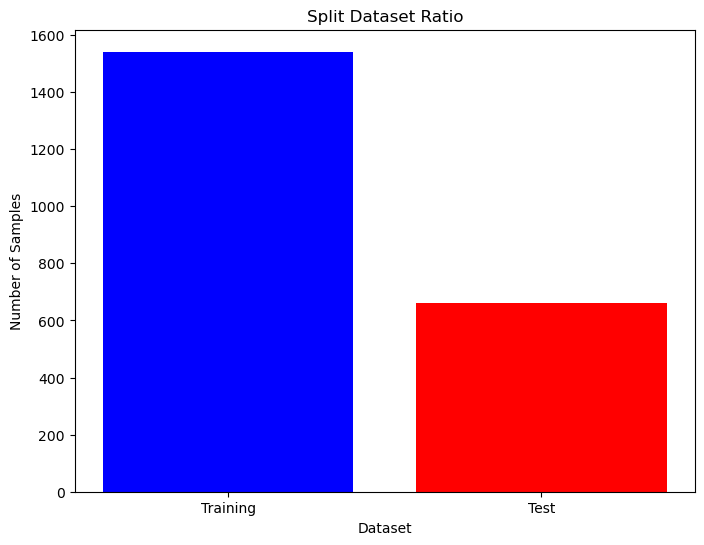

In [4]:
import matplotlib.pyplot as plt

# Count the number of samples in each dataset
train_count = len(X_train)
# val_count = len(X_val)
test_count = len(X_test)

# Plotting the bar chart
labels = ['Training', 'Test']
counts = [train_count, test_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'red'])
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.title('Split Dataset Ratio')
plt.show()

In [13]:
X_train = X_train.reshape(-1, 256, 256,3)
# X_val = X_val.reshape(-1, 126, 126, 3)
X_test = X_test.reshape(-1, 256, 256, 3)

print("Reshaped Training data shape:", X_train.shape)
# print("Reshaped Validation data shape:", X_val.shape)
print("Reshaped Test data shape:", X_test.shape)


Reshaped Training data shape: (1541, 256, 256, 3)
Reshaped Test data shape: (661, 256, 256, 3)


In [6]:
# from tensorflow.keras import applications
# base_model = applications.ResNet50(weights="imagenet", include_top=False, input_shape= (126, 126, 3)) #Update input shape
# base_model.trainable = False ## Not trainable weights


# base_model.summary()

In [18]:
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, Reshape, Dense, GlobalMaxPooling2D, Add, Activation, Permute, multiply
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras import regularizers
# from tensorflow.keras.layers import Multiply  # Import Multiply layer

# def cbam_attention(inputs, reduction_ratio=32):
#     # Channel attention
#     x = inputs
#     channel_axis = 1 if tf.keras.backend.image_data_format() == "channels_first" else -1
#     channel = x.shape[channel_axis]
#     shared_layer_one = Dense(channel // reduction_ratio, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.003), activation='relu', use_bias=True)
#     shared_layer_two = Dense(channel, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.003), use_bias=True)

#     avg_pool = GlobalAveragePooling2D()(x)
#     avg_pool = Reshape((1, 1, channel))(avg_pool)
#     avg_pool = shared_layer_one(avg_pool)
#     avg_pool = shared_layer_two(avg_pool)

#     max_pool = GlobalMaxPooling2D()(x)
#     max_pool = Reshape((1, 1, channel))(max_pool)
#     max_pool = shared_layer_one(max_pool)
#     max_pool = shared_layer_two(max_pool)

#     cbam_feature = Add()([avg_pool, max_pool])
#     cbam_feature = Activation('sigmoid')(cbam_feature)

#     if tf.keras.backend.image_data_format() == "channels_first":
#         cbam_feature = Permute((3, 1, 2))(cbam_feature)

#     attention_feature = multiply([x, cbam_feature])

#     # Spatial attention
#     kernel_size = 8
#     spatial_attention = Conv2D(1, (kernel_size, kernel_size), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.003), padding='same', activation='sigmoid', use_bias=False)(attention_feature)

#     if tf.keras.backend.image_data_format() == "channels_first":
#         spatial_attention = Permute((3, 1, 2))(spatial_attention)

#     attention_feature = multiply([attention_feature, spatial_attention])
#     return attention_feature

# # Load ResNet50 base model
# base_model = tf.keras.applications.ResNet50(weights="imagenet", include_top=False, input_shape=(256, 256, 3))

# # Set base model layers as non-trainable
# base_model.trainable = False

# # Add custom layers on top of base model
# x = base_model.output
# x = Conv2D(filters=1024, kernel_size=(3, 3), padding="valid", activation="relu")(x)
# c = cbam_attention(x, 8)
# x = GlobalAveragePooling2D()(c)
# x = Dense(1024, activation='relu')(x)
# x = Dense(512, activation='relu')(x)

# # Output layer for classification
# predictions = Dense(num_classes, activation='softmax')(x)

# # Create the final model
# model = Model(inputs=base_model.input, outputs=predictions)

# # Print model summary
# model.summary()








from tensorflow.keras.layers import Conv2D, Dropout, Activation, Multiply, Input, Add, Flatten, GlobalMaxPooling2D, Dense, Reshape, BatchNormalization, GlobalAveragePooling2D, Permute
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
import tensorflow as tf

def cbam_attention(inputs, reduction_ratio=8):
    # Channel attention
    x = inputs
    channel_axis = 1 if tf.keras.backend.image_data_format() == "channels_first" else -1
    channel = x.shape[channel_axis]
    
    shared_layer_one = Dense(channel // reduction_ratio, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.003), activation='relu')
    shared_layer_two = Dense(channel, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.003), use_bias=True)

    avg_pool = GlobalAveragePooling2D()(x)
    avg_pool = Reshape((1, 1, channel))(avg_pool)
    avg_pool = shared_layer_one(avg_pool)
    avg_pool = shared_layer_two(avg_pool)

    max_pool = GlobalMaxPooling2D()(x)
    max_pool = Reshape((1, 1, channel))(max_pool)
    max_pool = shared_layer_one(max_pool)
    max_pool = shared_layer_two(max_pool)

    cbam_feature = Add()([avg_pool, max_pool])
    cbam_feature = Activation('sigmoid')(cbam_feature)

    if tf.keras.backend.image_data_format() == "channels_first":
        cbam_feature = Permute((3, 1, 2))(cbam_feature)

        
    attention_feature = Multiply()([x, cbam_feature])

    # Spatial attention
    kernel_size = 7
    spatial_attention = Conv2D(1, (kernel_size, kernel_size), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.003), padding='same')(attention_feature)

    if tf.keras.backend.image_data_format() == "channels_first":
        spatial_attention = Permute((3, 1, 2))(spatial_attention)

    attention_feature = Multiply()([attention_feature, spatial_attention])

    return attention_feature

def residual_block(input_layer, filters, kernel_size):
    x = layers.Conv2D(filters, kernel_size, padding='same')(input_layer)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.ReLU()(x)
    # Add a 1x1 convolutional layer to adjust the number of channels
    adjust_channels = layers.Conv2D(filters, (1, 1), padding='same')(input_layer)
    x = Add()([x, adjust_channels])
    return x

# Explicitly name the input layer
visible = Input(shape=(256, 256, 3))

ds_1 = Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.003), activation='relu')(visible)
x1 = BatchNormalization()(ds_1)
ds_2 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.003), activation='relu')(x1)
x2 = BatchNormalization()(ds_2)
ds_3 = Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.003), activation='relu')(x2)
x3 = BatchNormalization()(ds_3)
ds_4 = Conv2D(filters=256, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.003), activation='relu')(x3)
x4 = BatchNormalization()(ds_4)
# ds_5 = Conv2D(filters=512, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.003), activation='relu')(ds_4)
c = cbam_attention(x4, 8)

# Residual block 1
x = residual_block(c, filters=32, kernel_size=(3, 3))


#replace global average pulling 
# Spatial Pyramid Pooling (SPP)
# pool_sizes = [4, 2, 1] 
# spp_layers = []
# for pool_size in pool_sizes:
#     spp = layers.MaxPooling2D(pool_size=(pool_size, pool_size))(x)
#     spp = layers.Flatten()(spp)
#     spp_layers.append(spp)

# spp = layers.Concatenate()(spp_layers)
# x = layers.Dense(512, activation='relu')(spp)
# x1 = layers.Dropout(0.25)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x1 = Dropout(0.25)(x)

# Fully Connected Layers
x10 = Dense(256, activation='relu')(x1)
x10 = Dense(128, activation='relu')(x10)

# Output Layer
output_layer = Dense(3, activation='softmax')(x10)

# Create the final model
model = Model(inputs=visible, outputs=output_layer)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 256, 256,  │        896 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        128 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 256, 256,  │     18,496 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_17[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 256, 256,  │     73,856 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        512 │ conv2d_18[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 256, 256,  │    295,168 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │      1,024 │ conv2d_19[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 256)       │          0 │ batch_normalizat… │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_4 (Reshape) │ (None, 1, 1, 256) │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_5 (Reshape) │ (None, 1, 1, 256) │          0 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 1, 1, 32)  │      8,224 │ reshape_4[0][0],  │
│                     │                   │            │ reshape_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 1, 1, 256) │      8,448 │ dense_12[0][0],   │
│                     │                   │            │ dense_12[1][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 1, 1, 256) │          0 │ dense_13[0][0],   │
│                     │                   │            │ dense_13[1][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 1, 1, 256) │          0 │ add_4[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 692,292 (2.64 MB)

 Trainable params: 691,332 (2.64 MB)

 Non-trainable params: 960 (3.75 KB)

In [19]:
# # Add new layers on top of the model
# x = base_model.output
# # x = GlobalAveragePooling2D()(x)  # Convert features to vectors
# x = Dense(128, activation='relu')(x)
# x = Dense(256, activation='relu')(x)
# # x = Dense(1024, activation='relu')(x)

# # Example of two additional layers
# x = Dropout(0.5)(x)  # Dropout layer to reduce overfitting
# # x = Dense(1024, activation='relu')(x)  # Another FC layer
# x = Dense(256, activation='relu')(x)  

# # Assuming a multi-class classification problem
# predictions = Dense(3, activation='softmax')(x)  # New softmax layer for 10 classes

# # Define the new model
# model = Model(inputs=base_model.input, outputs=predictions)

# # Compile the model
# # base_model.compile(optimizer=Adam(learning_rate=0.0001),
# #               loss='categorical_crossentropy',
# #               metrics=['accuracy'])

# # Model summary to see all layers
# model.summary()

In [20]:
from tensorflow.keras.optimizers import SGD, Adam

# sgd = SGD(lr=0.001,decay=1e-6, momentum=0.9, nesterov=True)

# # We are going to use accuracy metrics and cross entropy loss as performance parameters
# from tensorflow.keras.losses import binary_crossentropy,categorical_crossentropy
model.compile(
     optimizer = Adam(learning_rate = 0.0001),
     loss='categorical_crossentropy',
     metrics=['accuracy']
    )
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    patience=15,
    min_delta=0.001,
    monitor="val_acc",
    restore_best_weights=True
)


# Define the ModelCheckpoint callback to save the best weights
checkpoint = ModelCheckpoint(
    './checkpoint1/EPOCH.keras', 
    monitor='val_acc',
    save_best_only=True
)

In [21]:
history = model.fit(
     X_train,
     y_train,
     epochs=100,
     batch_size=32,
     validation_data=(X_test, y_test),
     callbacks=[checkpoint],
     verbose=1
    )

Epoch 1/100
 2/49 ━━━━━━━━━━━━━━━━━━━━ 57:59 74s/step - accuracy: 0.2031 - loss: 12.8204  

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(
     optimizer= Adam(learning_rate = 0.001) ,
     loss='categorical_crossentropy',
     metrics=['accuracy']
    )

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    patience=100,
    min_delta=0.0001,
    monitor="val_acc",
    restore_best_weights=True
)

checkpoint_directory = './checkpoints/'

# Define the filepath pattern for saving model checkpoints
# The placeholders {epoch} and {val_acc} will be replaced by the epoch number and validation accuracy
filepath_pattern = checkpoint_directory + 'model_{epoch:02d}_{val_acc:.4f}.keras'
# Define the ModelCheckpoint callback to save the best weights
checkpoint_directory =  '/workspace/Saksham/workspace,/Saksham/checkpoints'
epoch= 200
checkpoint = ModelCheckpoint(
   filepath_pattern, 
    monitor='val_acc',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [ ]:
history_model = model.fit(
    X_train,
    y_train,
    epochs=epoch,
    batch_size=32,
    validation_data=(X_val, y_val),  
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")
model.evaluate(X_train, y_train)
model.evaluate(X_test,y_test)

In [ ]:
model.evaluate(X_train, y_train)
model.evaluate(X_test,y_test)

In [ ]:
import tensorflow as tf
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

loaded_model = load_model('/workspace/Cracked/code/My model/Epoch/modelbest.h5')
# Define the class labels
class_labels = ["Class 0- CRACKED", "Class 1- NON-CRACKED"]

test_folder = "/workspace/Cracked/data/unseen data/1" 
# Iterate over each image in the test folder
for filename in os.listdir(test_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):  
        image_path = os.path.join(test_folder, filename)

        # Load and preprocess the image
        img = cv2.imread(image_path)
        img = cv2.resize(img, (128, 128))  
        img = img / 255.0 
        img = np.expand_dims(img, axis=0)  
        # Make predictions
        predictions = loaded_model.predict(img)

        # Check the class predictions
        class_prediction = np.argmax(predictions)

        if class_prediction == 0:
            result = "Class 0"
        else:
            result = "Class 1"

#         print(f"Image {filename} is classified as {result}")
#         cv2.putText(img, result, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
#         cv2.imshow('Image Classification', img)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()